# Exploratory data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [3]:
# Load the clean dataset
twitter_dataset = pd.read_csv('clean_tweeter_data.csv',index_col=0)
twitter_dataset.head()


/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


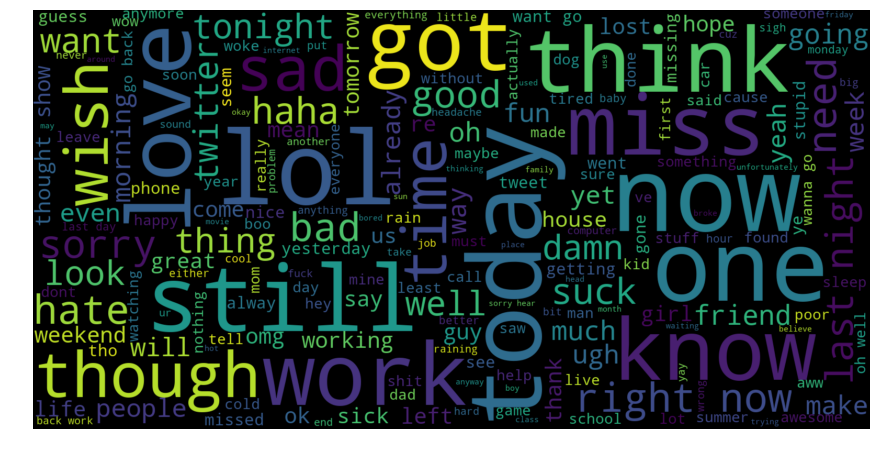

In [4]:
# Word Cloud of negative tweets

neg_tweets = twitter_dataset[twitter_dataset.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_string)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('negative.png', bbox_inches='tight')
plt.show()


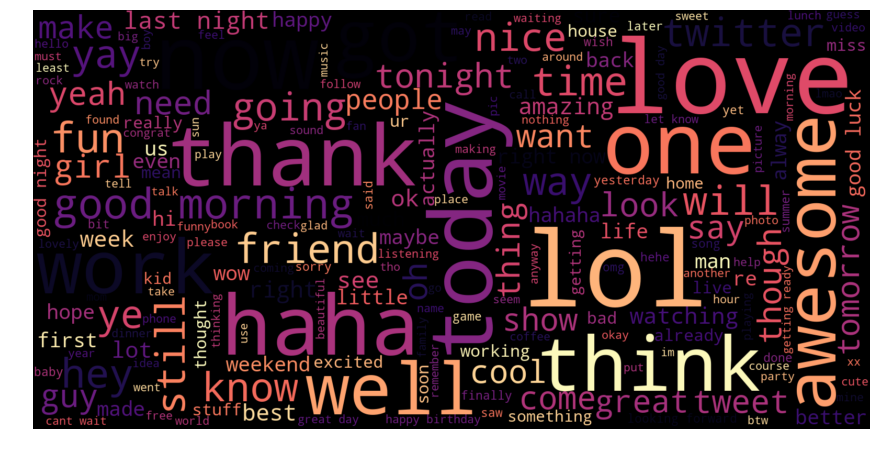

In [6]:
# Word Cloud of positive tweets

pos_tweets = twitter_dataset[twitter_dataset.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(15,12)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.savefig('positive.png', bbox_inches='tight')
plt.show()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
count_vec.fit(twitter_dataset.text)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
# Number of words
len(count_vec.get_feature_names())



264939

In [10]:
neg_doc_matrix = count_vec.transform(twitter_dataset[twitter_dataset.target == 0].text)
pos_doc_matrix = count_vec.transform(twitter_dataset[twitter_dataset.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=count_vec.get_feature_names()).transpose()


In [11]:
term_freq_df.head(10)


,0,1
aa,160,92
aaa,93,54
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12
aaaaaaa,9,1
aaaaaaaa,13,0
aaaaaaaaa,6,2
aaaaaaaaaa,6,3
aaaaaaaaaaa,4,1


In [12]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]


,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [13]:
# save
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')



In [15]:
# token frequency data for 10,000 tokens without stop words
count_vec2 = CountVectorizer(stop_words='english', max_features=10000)
count_vec2.fit(twitter_dataset.text)



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
# Number of words
len(count_vec2.get_feature_names())



10000

In [17]:
neg_doc_matrix = count_vec2.transform(twitter_dataset[twitter_dataset.target == 0].text)
pos_doc_matrix = count_vec2.transform(twitter_dataset[twitter_dataset.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=count_vec2.get_feature_names()).transpose()




In [18]:
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]



,negative,positive,total
just,64004,62944,126948
good,29209,62118,91327
day,41374,48186,89560
like,41050,37520,78570
today,38116,30100,68216
work,45420,19529,64949
love,16990,47694,64684
going,33689,30939,64628
got,33408,28037,61445
lol,23123,36118,59241


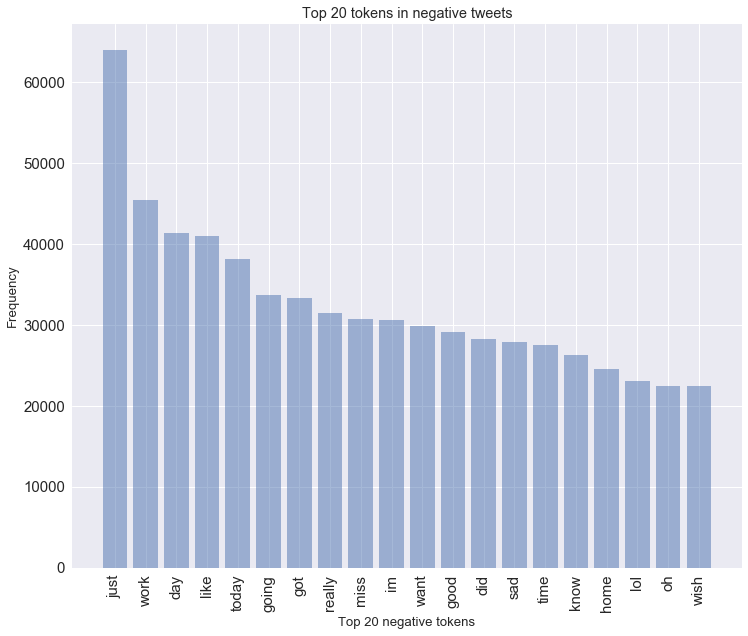

In [19]:
sns.set(font_scale=1.2)
y_pos = np.arange(20)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:20].index,
           rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Top 20 negative tokens')
plt.title('Top 20 tokens in negative tweets')
plt.savefig('negative frequency.png', bbox_inches='tight')
plt.show()



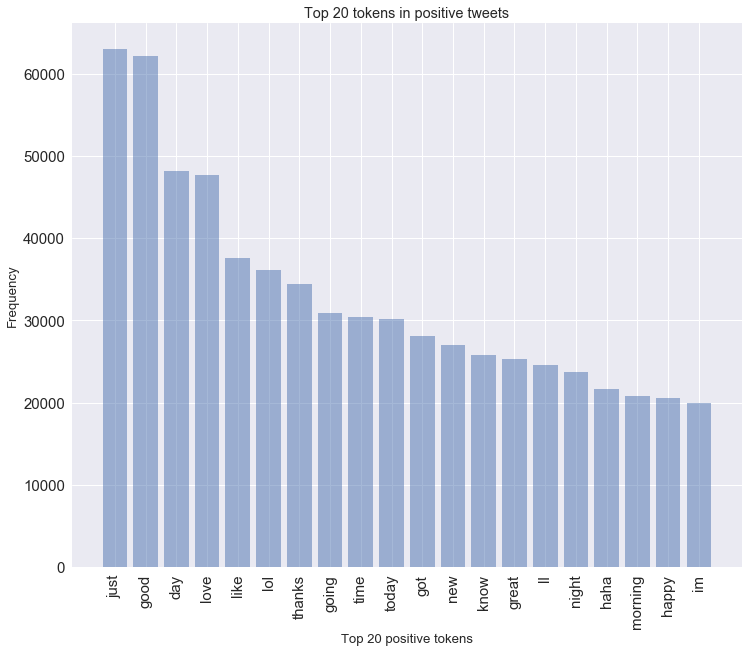

In [20]:
sns.set(font_scale=1.2)
y_pos = np.arange(20)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:20].index,
           rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Top 20 positive tokens')
plt.title('Top 20 tokens in positive tweets')
plt.savefig('positive frequency.png', bbox_inches='tight')
plt.show()


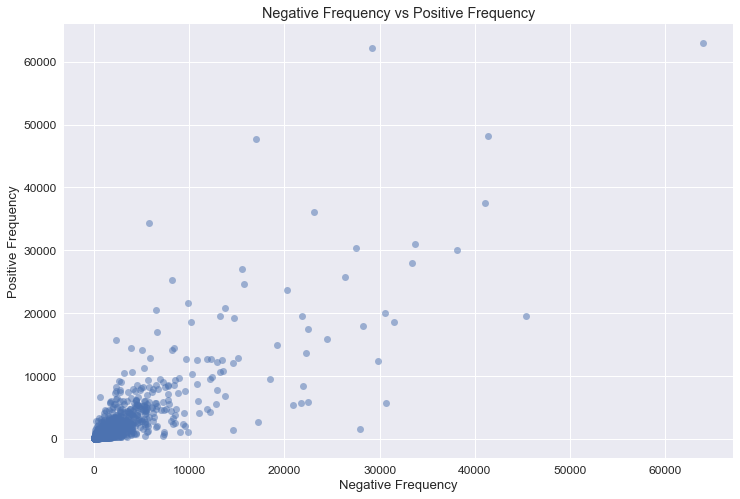

In [21]:
plt.figure(figsize=(12,8))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')
plt.savefig('positive vs negative.png', bbox_inches='tight')
plt.show()



$$\large pos-rate = \frac{positive frequency}{positive frequency + negative frequency}$$



In [22]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]


,negative,positive,total,pos_rate
emailunlimited,0,100,100,1.000000
dividends,0,83,83,1.000000
mileymonday,0,161,161,1.000000
shareholder,1,80,81,0.987654
fuzzball,2,99,101,0.980198
recommends,3,109,112,0.973214
delongeday,6,162,168,0.964286
atcha,3,80,83,0.963855
timestamp,3,68,71,0.957746
shaundiviney,4,89,93,0.956989



$$\large pos-freq-pct = \frac{positive frequency}{\sum positive frequency}$$



In [23]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]



,negative,positive,total,pos_rate,pos_freq_pct
just,64004,62944,126948,0.495825,0.014396
good,29209,62118,91327,0.680171,0.014207
day,41374,48186,89560,0.538030,0.011021
love,16990,47694,64684,0.737338,0.010908
like,41050,37520,78570,0.477536,0.008581
lol,23123,36118,59241,0.609679,0.008261
thanks,5768,34375,40143,0.856314,0.007862
going,33689,30939,64628,0.478724,0.007076
time,27526,30432,57958,0.525070,0.006960
today,38116,30100,68216,0.441245,0.006884



$$\large H = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$$


$$H: Harmonic-mean$$

In [24]:
from scipy.stats import hmean
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]



,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
just,64004,62944,126948,0.495825,0.014396,0.027980
good,29209,62118,91327,0.680171,0.014207,0.027833
day,41374,48186,89560,0.538030,0.011021,0.021599
love,16990,47694,64684,0.737338,0.010908,0.021498
like,41050,37520,78570,0.477536,0.008581,0.016860
lol,23123,36118,59241,0.609679,0.008261,0.016300
thanks,5768,34375,40143,0.856314,0.007862,0.015581
going,33689,30939,64628,0.478724,0.007076,0.013946
time,27526,30432,57958,0.525070,0.006960,0.013738
today,38116,30100,68216,0.441245,0.006884,0.013557


In [25]:
# Cumulative Distribution Function
# CDF can be explained as “distribution function of X, evaluated at x, 
# is the probability that X will take a value less than or equal to x”.

from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]



,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
welcome,620,6702,7322,0.915324,0.001533,0.003061,0.995623,0.999369,0.997493
thank,2282,15736,18018,0.873349,0.003599,0.007168,0.990791,1.000000,0.995374
thanks,5768,34375,40143,0.856314,0.007862,0.015581,0.987770,1.000000,0.993847
awesome,3821,14469,18290,0.791088,0.003309,0.006591,0.967038,1.000000,0.983243
glad,2273,8255,10528,0.784100,0.001888,0.003767,0.963666,0.999971,0.981483
follow,2552,9154,11706,0.781992,0.002094,0.004176,0.962596,0.999996,0.980940
enjoy,1642,5876,7518,0.781591,0.001344,0.002683,0.962389,0.997441,0.979602
sweet,1610,5646,7256,0.778115,0.001291,0.002578,0.960559,0.996331,0.978118
yay,3165,10501,13666,0.768403,0.002402,0.004788,0.955061,1.000000,0.977014
hello,1122,4524,5646,0.801275,0.001035,0.002067,0.971487,0.982293,0.976860


In [26]:
# Negative tokens
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]



,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
sad,27911,1510,29421,0.051324,0.000345,0.000686,0.002393,0.709591,0.004771,0.948676,0.006096,0.012114,0.997607,1.000000,0.998802
hurts,7204,456,7660,0.059530,0.000104,0.000208,0.002808,0.503854,0.005585,0.940470,0.001573,0.003141,0.997192,0.999742,0.998465
sick,14617,1419,16036,0.088488,0.000325,0.000647,0.004842,0.693343,0.009616,0.911512,0.003192,0.006362,0.995158,1.000000,0.997573
sucks,9902,982,10884,0.090224,0.000225,0.000448,0.004997,0.610419,0.009914,0.909776,0.002163,0.004315,0.995003,0.999999,0.997495
poor,7333,719,8052,0.089295,0.000164,0.000328,0.004913,0.557659,0.009741,0.910705,0.001602,0.003197,0.995087,0.999799,0.997437
ugh,9056,998,10054,0.099264,0.000228,0.000455,0.005883,0.613574,0.011655,0.900736,0.001978,0.003947,0.994117,0.999995,0.997047
missing,7282,991,8273,0.119787,0.000227,0.000452,0.008429,0.612194,0.016629,0.880213,0.001590,0.003175,0.991571,0.999778,0.995658
headache,5317,421,5738,0.073371,0.000096,0.000192,0.003657,0.496667,0.007261,0.926629,0.001161,0.002320,0.996343,0.993811,0.995075
hate,17207,2614,19821,0.131880,0.000598,0.001190,0.010345,0.868740,0.020446,0.868120,0.003758,0.007484,0.989655,1.000000,0.994801
miss,30713,5676,36389,0.155981,0.001298,0.002575,0.015317,0.996497,0.030171,0.844019,0.006708,0.013310,0.984683,1.000000,0.992282


In [30]:
# save
term_freq_df2.to_csv('term_freq_df2.csv',encoding='utf-8')


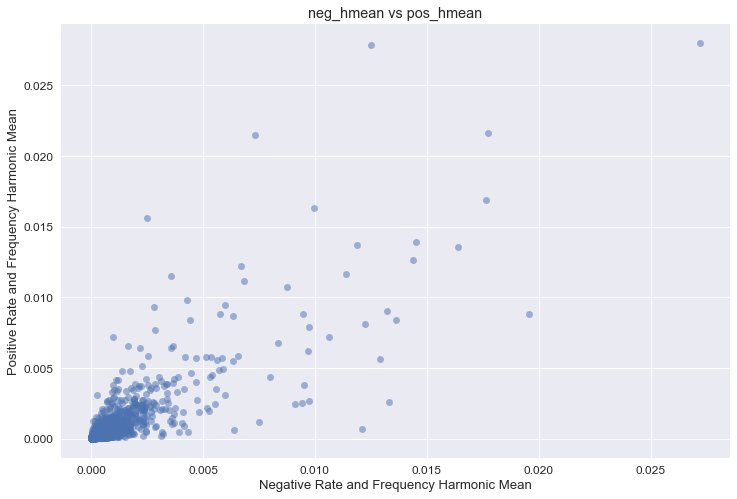

In [27]:
plt.figure(figsize=(12,8))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')
plt.show()



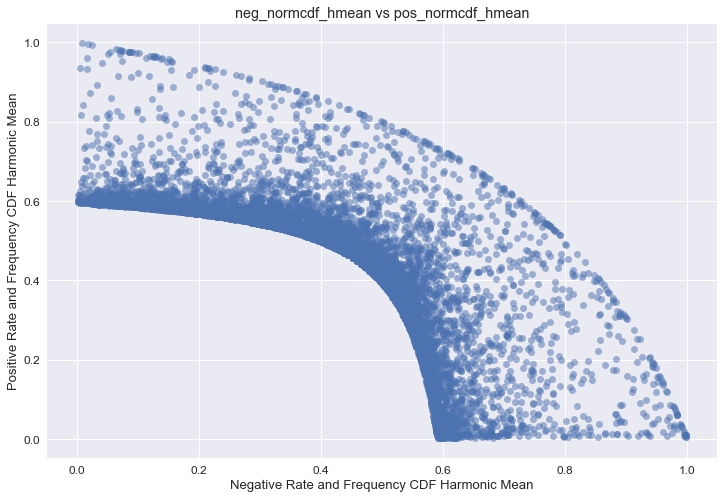

In [28]:
plt.figure(figsize=(12,8))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')
plt.show()



In [29]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)


Loading BokehJS ...